In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [6]:
#drop month,day and year
df.drop(['day','month','year'],axis=1,inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [9]:
# Encoding of the categories in classes
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [10]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [11]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [12]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [13]:
## Independent And dependent features
x=df.drop('FWI',axis=1)
y=df['FWI']

In [14]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [15]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [16]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

In [17]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [18]:
#Feature Selection based on carrelaltion
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.632603,-0.276940,-0.330300,0.696636,0.485381,0.402618,0.612643,0.469295,0.544552,0.217014
RH,-0.632603,1.000000,0.284878,0.216989,-0.648727,-0.430816,-0.268378,-0.674245,-0.385272,-0.429688,-0.382272
Ws,-0.276940,0.284878,1.000000,0.187858,-0.202555,-0.023306,0.058029,-0.028594,0.009506,-0.128823,-0.205389
Rain,-0.330300,0.216989,0.187858,1.000000,-0.528326,-0.279693,-0.289968,-0.338240,-0.290936,-0.360923,-0.050380
FFMC,0.696636,-0.648727,-0.202555,-0.528326,1.000000,0.616007,0.522644,0.749150,0.607508,0.777949,0.213566
DMC,0.485381,-0.430816,-0.023306,-0.279693,0.616007,1.000000,0.878280,0.691288,0.982519,0.606479,0.194447
DC,0.402618,-0.268378,0.058029,-0.289968,0.522644,0.878280,1.000000,0.530794,0.941766,0.528517,-0.062961
ISI,0.612643,-0.674245,-0.028594,-0.338240,0.749150,0.691288,0.530794,1.000000,0.662441,0.751002,0.235096
BUI,0.469295,-0.385272,0.009506,-0.290936,0.607508,0.982519,0.941766,0.662441,1.000000,0.610694,0.096437
Classes,0.544552,-0.429688,-0.128823,-0.360923,0.777949,0.606479,0.528517,0.751002,0.610694,1.000000,0.132260


# Feature Selection

<AxesSubplot: >

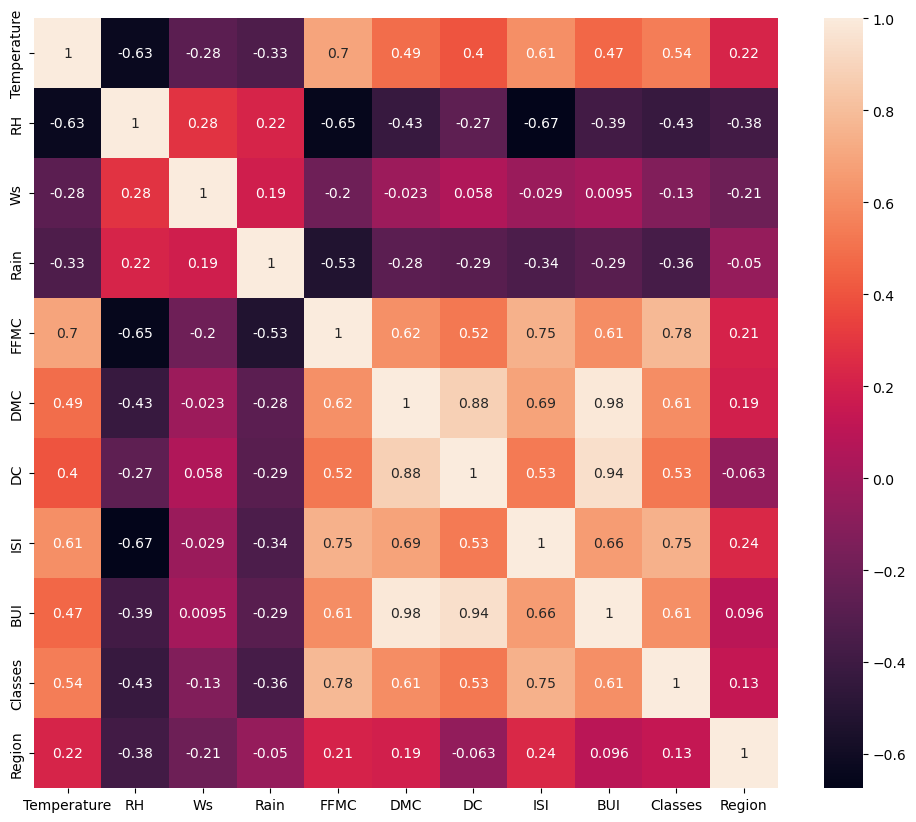

In [19]:
# check for multicollinearity
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [20]:
x_train.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.632603,-0.276940,-0.330300,0.696636,0.485381,0.402618,0.612643,0.469295,0.544552,0.217014
RH,-0.632603,1.000000,0.284878,0.216989,-0.648727,-0.430816,-0.268378,-0.674245,-0.385272,-0.429688,-0.382272
Ws,-0.276940,0.284878,1.000000,0.187858,-0.202555,-0.023306,0.058029,-0.028594,0.009506,-0.128823,-0.205389
Rain,-0.330300,0.216989,0.187858,1.000000,-0.528326,-0.279693,-0.289968,-0.338240,-0.290936,-0.360923,-0.050380
FFMC,0.696636,-0.648727,-0.202555,-0.528326,1.000000,0.616007,0.522644,0.749150,0.607508,0.777949,0.213566
DMC,0.485381,-0.430816,-0.023306,-0.279693,0.616007,1.000000,0.878280,0.691288,0.982519,0.606479,0.194447
DC,0.402618,-0.268378,0.058029,-0.289968,0.522644,0.878280,1.000000,0.530794,0.941766,0.528517,-0.062961
ISI,0.612643,-0.674245,-0.028594,-0.338240,0.749150,0.691288,0.530794,1.000000,0.662441,0.751002,0.235096
BUI,0.469295,-0.385272,0.009506,-0.290936,0.607508,0.982519,0.941766,0.662441,1.000000,0.610694,0.096437
Classes,0.544552,-0.429688,-0.128823,-0.360923,0.777949,0.606479,0.528517,0.751002,0.610694,1.000000,0.132260


In [21]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [22]:
# threshold --- Domain expertise
corr_features=correlation(x_train,0.85)

In [23]:
corr_features

{'BUI', 'DC'}

In [24]:
# drop features when correlation in more than 0.85
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((182, 9), (61, 9))

# Feature Scaling Or Standardization

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [26]:
x_train_scaled

array([[-0.27688003,  0.85321886, -0.87860649, ..., -0.75597877,
        -1.08012345, -1.        ],
       [-0.27688003, -0.50298928, -1.57084191, ...,  0.16190308,
         0.9258201 , -1.        ],
       [-1.36644038, -0.29955806,  0.50586434, ...,  0.93857234,
         0.9258201 ,  1.        ],
       ...,
       [-0.00448995,  0.3107356 , -0.53248878, ..., -0.87365593,
        -1.08012345,  1.        ],
       [ 1.0850704 , -1.24890376, -0.87860649, ...,  0.84443061,
         0.9258201 ,  1.        ],
       [ 2.17463074, -2.13043906, -0.18637107, ...,  2.79787148,
         0.9258201 ,  1.        ]])

# BOX PLOTS TO UNDERSTAND EFFECT OF STANDARD SCALER

/tmp/ipykernel_99/2715941385.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'x_train After Scaling')

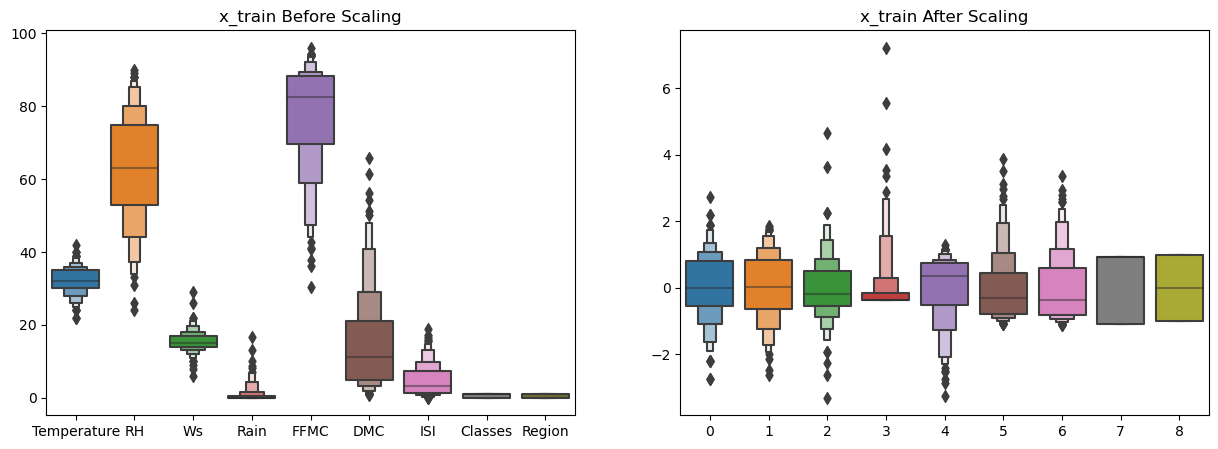

In [28]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxenplot(data=x_train)
plt.title('x_train Before Scaling')
plt.subplot(1,2,2)
sns.boxenplot(data=x_train_scaled)
plt.title('x_train After Scaling')

# Linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error',mae)
print('R2 Score',score)

Mean absolute error 0.5670984536749398
R2 Score 0.9826446263791835


# Leasso Regression

In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print('R2 Score',score)

mean absolute error 1.0185004953444188
R2 Score 0.9588635787062445


# Ridge Regression model

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error',mae)
print('R2 score',score)

Mean absolute error 0.582789268571602
R2 score 0.9820278233054311


# Elasticnet Regression

In [33]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred=elastic.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error',mae)
print('R2 score',score)

Mean absolute error 1.6607844178200581
R2 score 0.8913710465793633


In [ ]:
import pickle
pickle.dump(scaler,open(scaler.p))